In [ ]:
# Import the necessary libraries

import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from keras.metrics import MeanAbsoluteError, MeanSquaredError
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving AAPL 3.csv to AAPL 3 (5).csv


In [ ]:
APLStock = pd.read_csv(io.BytesIO(uploaded['AAPL 3 (5).csv']))
print(APLStock)

             Date        Open        High         Low       Close   Adj Close  \
0      1980-12-12    0.128348    0.128906    0.128348    0.128348    0.100178   
1      1980-12-15    0.122210    0.122210    0.121652    0.121652    0.094952   
2      1980-12-16    0.113281    0.113281    0.112723    0.112723    0.087983   
3      1980-12-17    0.115513    0.116071    0.115513    0.115513    0.090160   
4      1980-12-18    0.118862    0.119420    0.118862    0.118862    0.092774   
...           ...         ...         ...         ...         ...         ...   
10463  2022-06-13  132.869995  135.199997  131.440002  131.880005  131.880005   
10464  2022-06-14  133.130005  133.889999  131.479996  132.759995  132.759995   
10465  2022-06-15  134.289993  137.339996  132.160004  135.429993  135.429993   
10466  2022-06-16  132.080002  132.389999  129.039993  130.059998  130.059998   
10467  2022-06-17  130.070007  133.080002  129.809998  131.559998  131.559998   

          Volume  
0      4

In [ ]:
APLStock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [ ]:
APLStock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,14.757987,14.921491,14.594484,14.763533,14.130431,3.308489e+08
std,31.914174,32.289158,31.543959,31.929489,31.637275,3.388418e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289286,0.276786,0.283482,0.235462,1.237768e+08
50%,0.474107,0.482768,0.465960,0.475446,0.392373,2.181592e+08
75%,14.953303,15.057143,14.692589,14.901964,12.835269,4.105794e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


In [ ]:
APLStock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [ ]:
APLStock.shape

(10468, 7)

In [ ]:
# Check for null values
APLStock.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# Check the data types of the columns
APLStock.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
# Convert the "Date" column to datetime format
APLStock["Date"] = pd.to_datetime(APLStock["Date"])

In [ ]:
plt.style.use('seaborn')

<ipython-input-177-4a43041a1d49>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


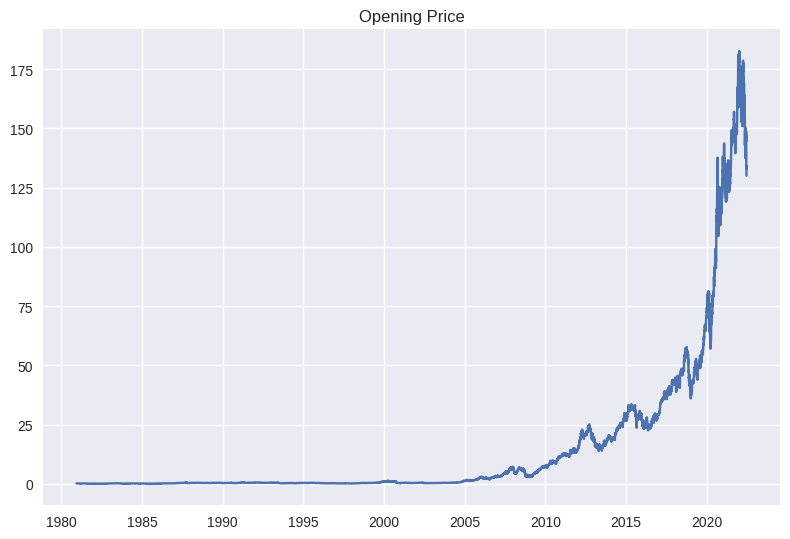

In [ ]:
# Plot the Opening Price of APLStock over time
plt.plot_date(APLStock.Date, APLStock["Open"], markersize=0.5, linestyle="-")
plt.title("Opening Price")
plt.tight_layout()
plt.show()

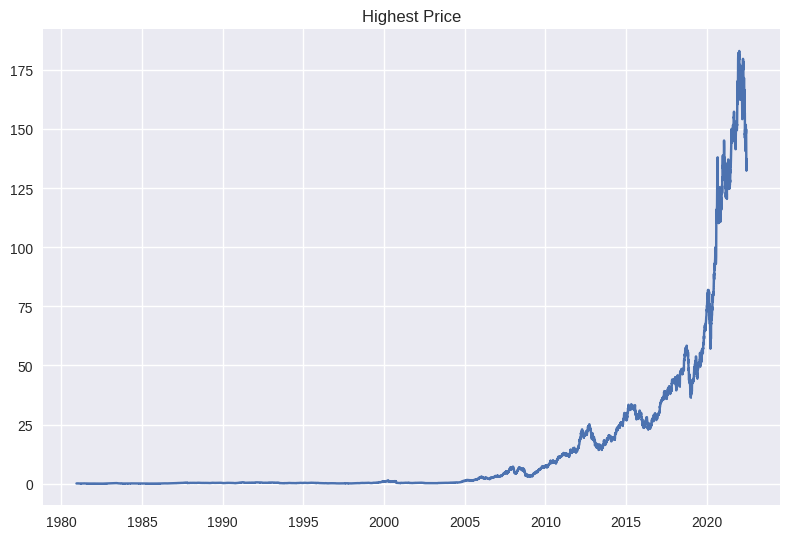

In [ ]:
# Plot the Highest Price of APLStock over time
plt.plot_date(APLStock.Date, APLStock["High"], markersize=0.5, linestyle="-")
plt.title("Highest Price")
plt.tight_layout()
plt.show()

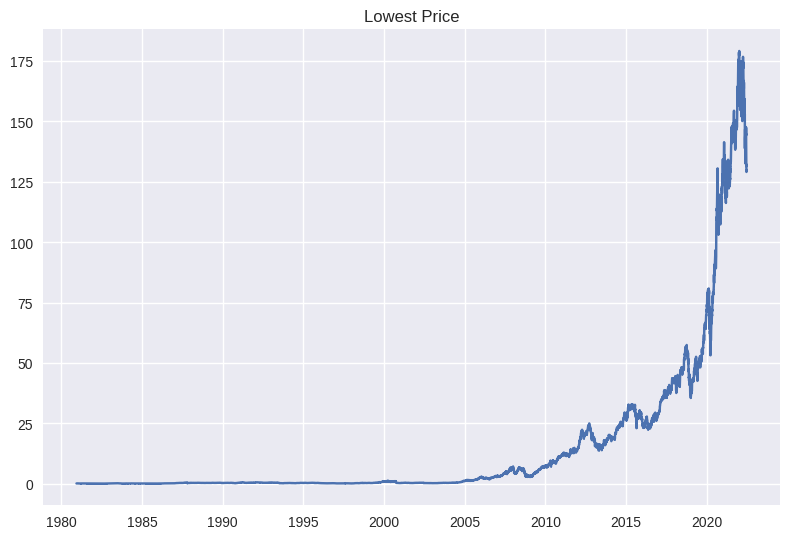

In [ ]:
# Plot the Lowest Price of APLStock over time
plt.plot_date(APLStock.Date, APLStock["Low"], markersize=0.5, linestyle="-")
plt.title("Lowest Price")
plt.tight_layout()
plt.show()

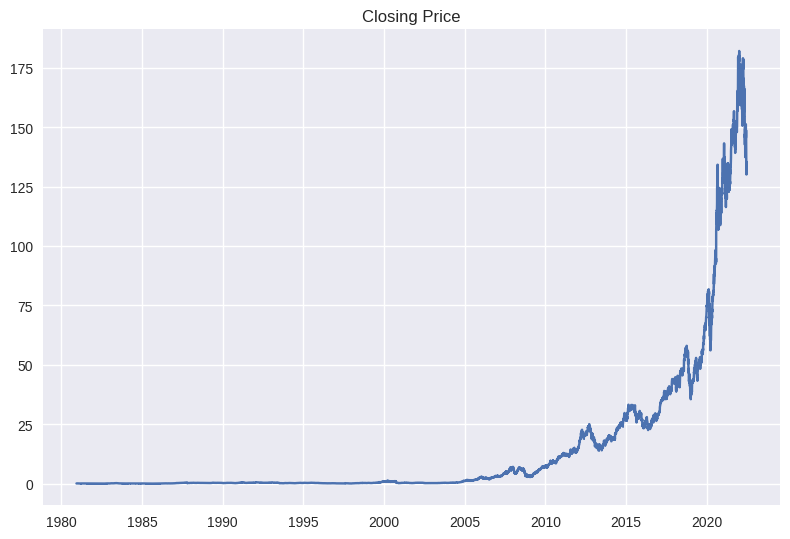

In [ ]:
# Plot the Closing Price of APLStock over time
plt.plot_date(APLStock.Date, APLStock["Close"], markersize=0.5, linestyle="-")
plt.title("Closing Price")
plt.tight_layout()
plt.show()

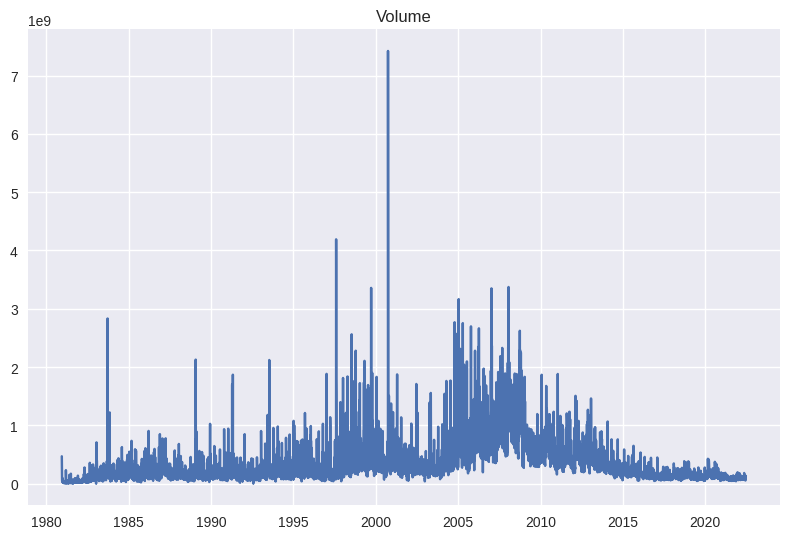

In [ ]:
# Plot the Volume of APLStock over time
plt.plot_date(APLStock.Date, APLStock["Volume"], markersize=0.5, linestyle="-")
plt.title("Volume")
plt.tight_layout()
plt.show()

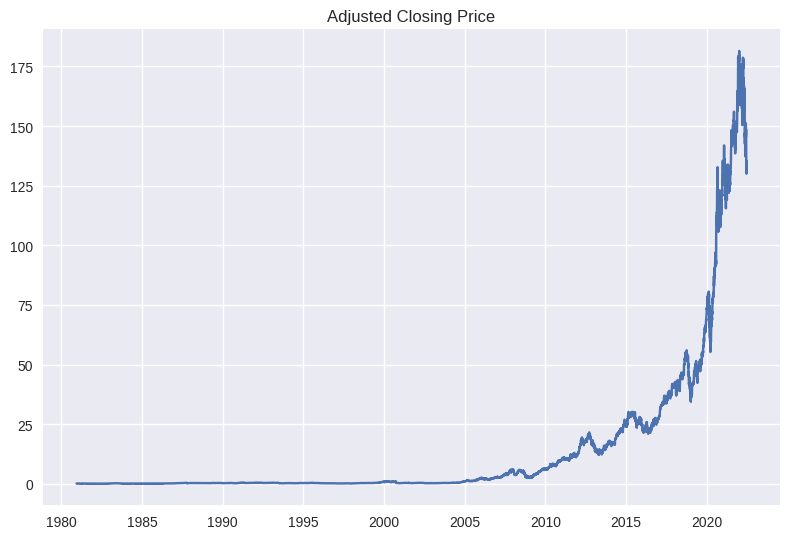

In [ ]:
# Plot the Adjusted Closing Price of APLStock over time
plt.plot_date(APLStock.Date, APLStock["Adj Close"], markersize=0.5, linestyle="-")
plt.title("Adjusted Closing Price")
plt.tight_layout()
plt.show()

In [ ]:
# Get the list of columns in the APLStock DataFrame
APLStock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

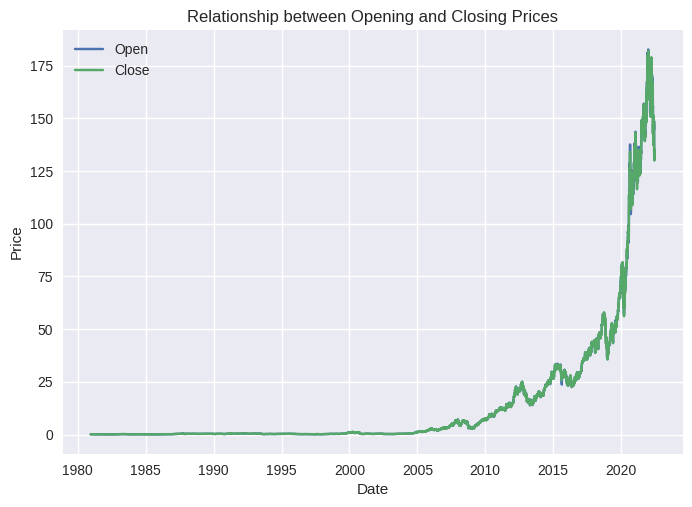

In [ ]:
# Plot the relationship between opening and closing prices over time
plt.plot(APLStock.Date, APLStock["Open"], label="Open")
plt.plot(APLStock.Date, APLStock["Close"], label="Close")
plt.title("Relationship between Opening and Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

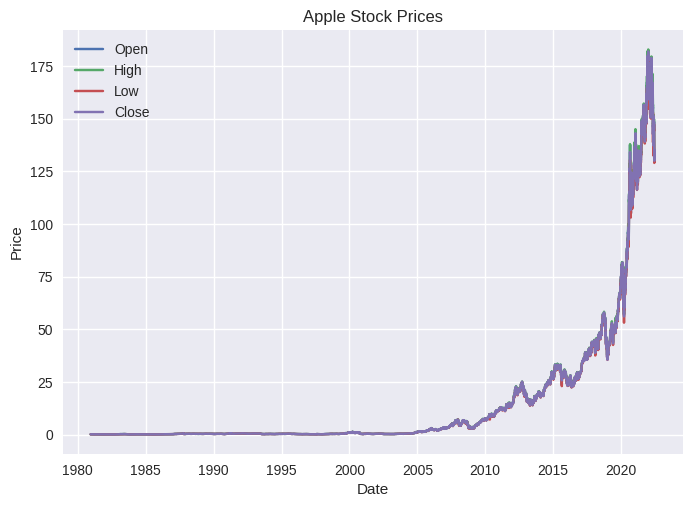

In [ ]:
# Plot Apple Stock prices over time
plt.plot(APLStock.Date, APLStock["Open"], label="Open")
plt.plot(APLStock.Date, APLStock["High"], label="High")
plt.plot(APLStock.Date, APLStock["Low"], label="Low")
plt.plot(APLStock.Date, APLStock["Close"], label="Close")
plt.title("Apple Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
# Set the "Date" column as the index for the APLStock DataFrame
APLStock.set_index(APLStock['Date'], drop=False, append=False, inplace=True, verify_integrity=False)

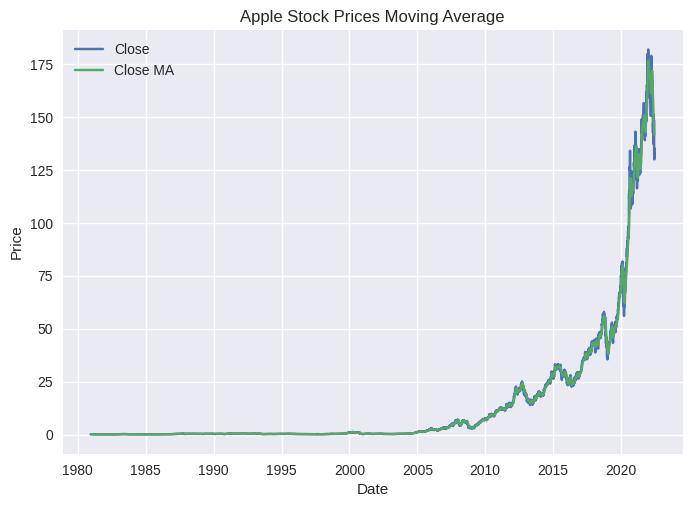

In [ ]:
# Plot Apple Stock Prices and Moving Average
APLStock["Close MA"] = APLStock["Close"].rolling(window=20).mean()
plt.plot(APLStock["Close"], label="Close")
plt.plot(APLStock["Close MA"], label="Close MA")
plt.title("Apple Stock Prices Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
# The moving average graph shows that the close price has been trending upward over the past 7 years. The moving average has also been trending upwards, which suggests that the trend is liekely to continue.

# However there have been some periods of volatility, such as the 2020 COVID-19 Pandemic. During these periods, the Close price has deviated from the moving average. However the close price has always returned to the moving average, suggesting that the trend is still intact.

# Overall, the moving average graph suggests that AAPL's stock prices are a good investment for the long term. However, investors should be aware of the potential for volatility in the short term.

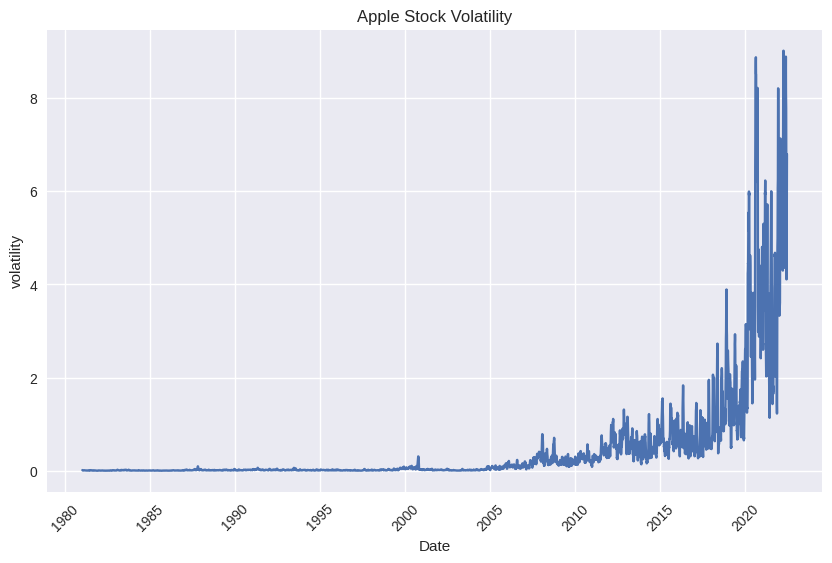

In [ ]:
# Plot Apple Stock Volatility
closing_prices = APLStock['Close']
statistics = closing_prices.describe()
volatility = closing_prices.rolling(window=20).std()
plt.figure(figsize=(10, 6))
plt.plot(APLStock['Date'], volatility)
plt.xlabel('Date')
plt.ylabel('volatility')
plt.title('Apple Stock Volatility')
plt.xticks(rotation=45)
plt.show()

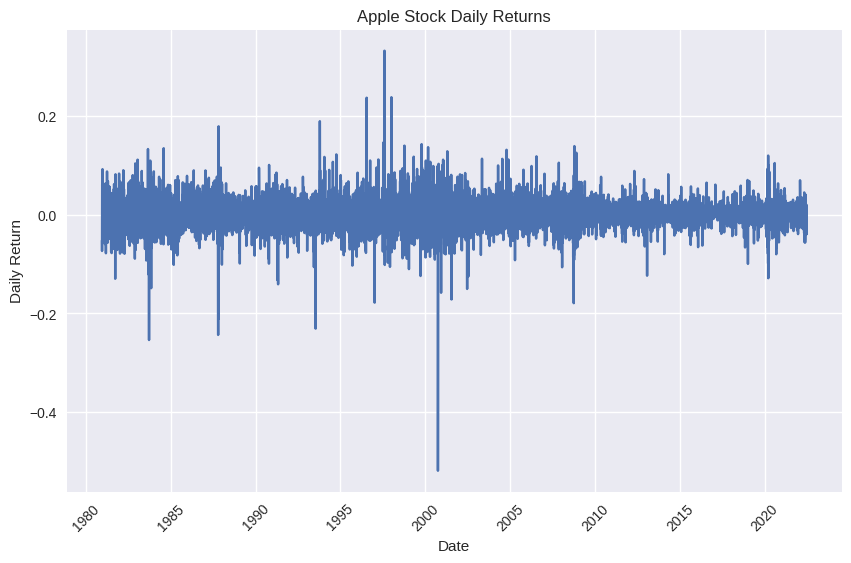

In [ ]:
# Plot Apple Stock daily returns over time
daily_returns = closing_prices.pct_change()
plt.figure(figsize=(10, 6))
plt.plot(APLStock['Date'], daily_returns)
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Apple Stock Daily Returns')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Extracting close prices and reshaping it
close_prices = APLStock['Close'].values.reshape(-1, 1)

# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(close_prices)

# Splitting data into training (80%) and testing (20%) sets
train_data, test_data = train_test_split(normalized_data, test_size=0.2, shuffle=False)

# Function to create sequences for LSTM model
def create_sequences(data, seq_length):
    X, y = [], []

    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        label = data[i + seq_length]
        X.append(seq)
        y.append(label)

    return np.array(X), np.array(y)

# Defining a sequence length (e.g., 60 days) and creating sequences
seq_length = 60
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshaping to fit the LSTM input requirements
X_train = X_train.reshape(X_train.shape[0], seq_length, 1)
X_test = X_test.reshape(X_test.shape[0], seq_length, 1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((8314, 60, 1), (8314, 1), (2034, 60, 1), (2034, 1))

In [ ]:
# Model Building
stock_model = Sequential()

# First layer including 20% dropout
stock_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
stock_model.add(Dropout(0.2))

# Second layer including 20% dropout
stock_model.add(LSTM(50, return_sequences=True))
stock_model.add(Dropout(0.2))

# Third LSTM layer
stock_model.add(LSTM(50))

# Dense layer for prediction output
stock_model.add(Dense(1))

# Model compilation
stock_model.compile(optimizer='adam', loss='mean_squared_error', metrics= [MeanAbsoluteError(), MeanSquaredError()])

# Model training
stock_history = stock_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/20
260/260 [==============================] - 27s 89ms/step - loss: 2.9354e-05 - mean_absolute_error: 0.0026 - mean_squared_error: 2.9354e-05 - val_loss: 0.0054 - val_mean_absolute_error: 0.0452 - val_mean_squared_error: 0.0054
Epoch 2/20
260/260 [==============================] - 21s 82ms/step - loss: 7.1474e-06 - mean_absolute_error: 0.0016 - mean_squared_error: 7.1474e-06 - val_loss: 0.0053 - val_mean_absolute_error: 0.0423 - val_mean_squared_error: 0.0053
Epoch 3/20
260/260 [==============================] - 20s 79ms/step - loss: 7.6182e-06 - mean_absolute_error: 0.0018 - mean_squared_error: 7.6182e-06 - val_loss: 0.0053 - val_mean_absolute_error: 0.0424 - val_mean_squared_error: 0.0053
Epoch 4/20
260/260 [==============================] - 21s 81ms/step - loss: 6.5359e-06 - mean_absolute_error: 0.0016 - mean_squared_error: 6.5359e-06 - val_loss: 0.0073 - val_mean_absolute_error: 0.0528 - val_mean_squared_error: 0.0073
Epoch 5/20
260/260 [==============================] - 21

64/64 [==============================] - 2s 18ms/step


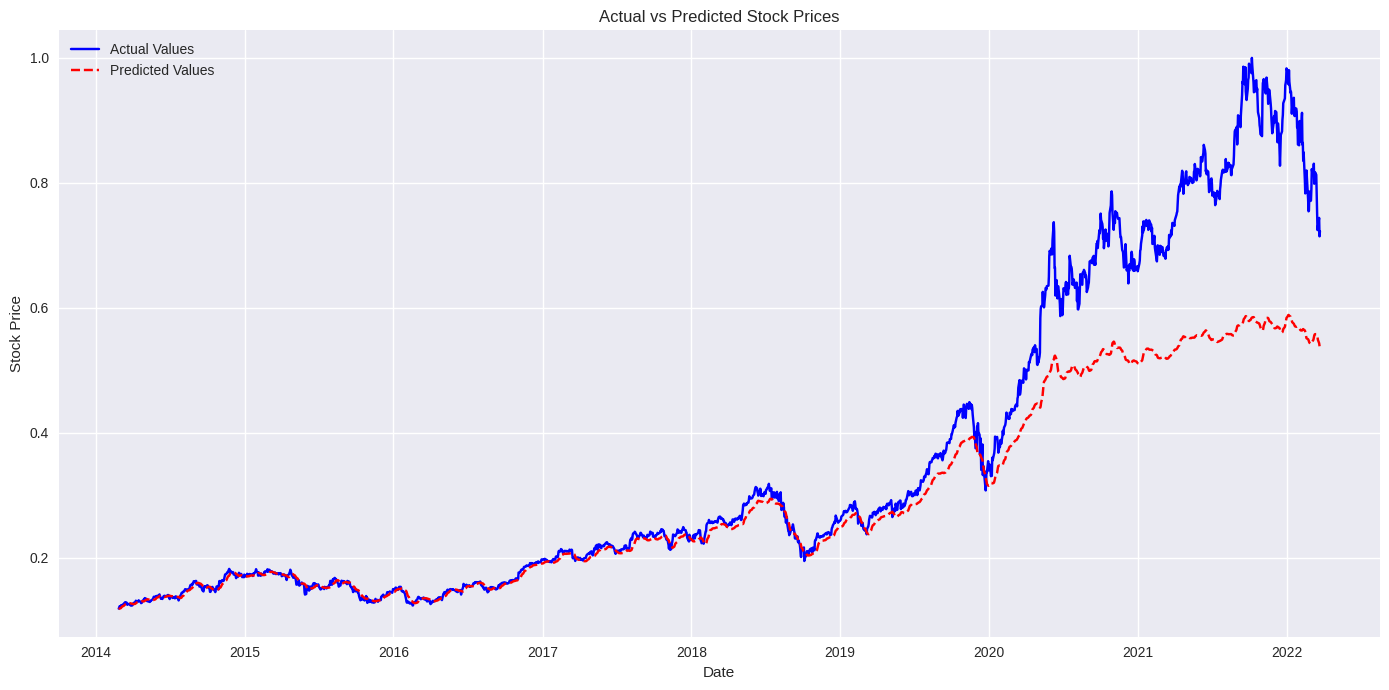

In [ ]:
# Generating predictions on the test set
y_pred = stock_model.predict(X_test)

train_size = int(len(normalized_data) * 0.8)

# Ensure the dates array matches the length of y_test
dates = APLStock['Date'][train_size:train_size + len(y_test)].reset_index(drop=True)

# Plotting the actual vs predicted stock prices
plt.figure(figsize=(14, 7))
plt.plot(dates, y_test, label='Actual Values', color='blue')
plt.plot(dates, y_pred, label='Predicted Values', color='red', linestyle='--')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
y_pred = stock_model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

64/64 [==============================] - 1s 19ms/step


In [ ]:
# Truncate y_pred to match the shape of y_test
y_pred_truncated = y_pred[:len(y_test)]

# Compute errors
mae = np.mean(np.abs(y_test - y_pred_truncated))
mse = np.mean((y_test - y_pred_truncated) ** 2)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 11.621155007594405
Mean Squared Error: 485.70587417846366
Root Mean Squared Error: 22.03873576633795
